/tmp/ipykernel_434273/2245965876.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / tβ
/tmp/ipykernel_434273/2245965876.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return -1 / tβ
/tmp/ipykernel_434273/2245965876.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return (nc * mhp) / (8 * np.pi) * ((1 - (x1cs + x2cs)**2) * (ξdX(tβ) * vcs * ms + ξuX(tβ) * vcs * mc)**2 + (1 - (x1cs + x2cs)**2) * (ξdX(tβ) * vcs * ms - ξuX(tβ) * vcs * mc)**2) * λ(x1cs**2, x2cs**2)
/tmp/ipykernel_434273/2245965876.py:58: RuntimeWarning: invalid value encountered in double_scalars
  return (nc * mhp) / (8 * np.pi) * ((1 - (x1cb + x2cb)**2) * (ξdX(tβ) * vcb * mb + ξuX(tβ) * vcb * mc)**2 + (1 - (x1cb + x2cb)**2) * (ξdX(tβ) * vcb * mb - ξuX(tβ) * vcb * mc)**2) * λ(x1cb**2, x2cb**2)


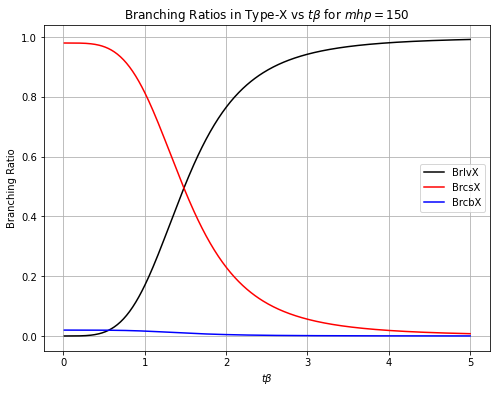

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Parameters
nc = 3
mhp = 150
mc = 1.29
ms = 0.095
mt = 175
mb = 4.17
Gf = 1.16637e-5
v = 246
vcs = 0.98
vcb = 0.0412
vtb = 1.02
sβα = 0.999
cβα = np.sqrt(1 - sβα**2)
g = 2 * 91 / v  # mw is 91
mw = 91
ml = 1.77

def λ(x, y):
    return 1 + x**2 + y**2 - 2*x - 2*y - 2*x*y

# Helper functions for charged Higgs decay to quarks
def ξdX(tβ):
    return 1 / tβ

def ξuX(tβ):
    return -1 / tβ

def ξlX(tβ):
    return tβ

def ξdI(tβ):
    return 1 / tβ

def ξuI(tβ):
    return -(1 / tβ)

def ξlI(tβ):
    return 1 / tβ

# Decay widths for different processes
def dechplvX(mhp, tβ):
    x1lv = 0 / mhp
    x2lv = ml / mhp
    return mhp / (8 * np.pi) * ((1 - (x1lv + x2lv)**2) * ξlX(tβ)**2 + (1 - (x1lv + x2lv)**2) * ξlX(tβ)**2) * λ(x1lv**2, x2lv**2)

def dechpcsX(mhp, tβ):
    x1cs = mc / mhp
    x2cs = ms / mhp
    return (nc * mhp) / (8 * np.pi) * ((1 - (x1cs + x2cs)**2) * (ξdX(tβ) * vcs * ms + ξuX(tβ) * vcs * mc)**2 + (1 - (x1cs + x2cs)**2) * (ξdX(tβ) * vcs * ms - ξuX(tβ) * vcs * mc)**2) * λ(x1cs**2, x2cs**2)

def dechpcbX(mhp, tβ):
    x1cb = mc / mhp
    x2cb = mb / mhp
    return (nc * mhp) / (8 * np.pi) * ((1 - (x1cb + x2cb)**2) * (ξdX(tβ) * vcb * mb + ξuX(tβ) * vcb * mc)**2 + (1 - (x1cb + x2cb)**2) * (ξdX(tβ) * vcb * mb - ξuX(tβ) * vcb * mc)**2) * λ(x1cb**2, x2cb**2)

# Branching ratios
def BrlvX(mhp, tβ):
    return dechplvX(mhp, tβ) / (dechplvX(mhp, tβ) + dechpcsX(mhp, tβ) + dechpcbX(mhp, tβ))

def BrcsX(mhp, tβ):
    return dechpcsX(mhp, tβ) / (dechplvX(mhp, tβ) + dechpcsX(mhp, tβ) + dechpcbX(mhp, tβ))

def BrcbX(mhp, tβ):
    return dechpcbX(mhp, tβ) / (dechplvX(mhp, tβ) + dechpcsX(mhp, tβ) + dechpcbX(mhp, tβ))

# Plotting
tβX_range = np.linspace(0, 5, 400)

BrlvX_vals = [BrlvX(150, tβ) for tβ in tβX_range]
BrcsX_vals = [BrcsX(150, tβ) for tβ in tβX_range]
BrcbX_vals = [BrcbX(150, tβ) for tβ in tβX_range]

plt.figure(figsize=(8, 6))
plt.plot(tβX_range, BrlvX_vals, label="BrlvX", color="black")
plt.plot(tβX_range, BrcsX_vals, label="BrcsX", color="red")
plt.plot(tβX_range, BrcbX_vals, label="BrcbX", color="blue")
plt.xlabel("$t\\beta$")
plt.ylabel("Branching Ratio")
plt.title("Branching Ratios in Type-X vs $t\\beta$ for $mhp=150$")
plt.grid(True)
plt.legend()
plt.show()


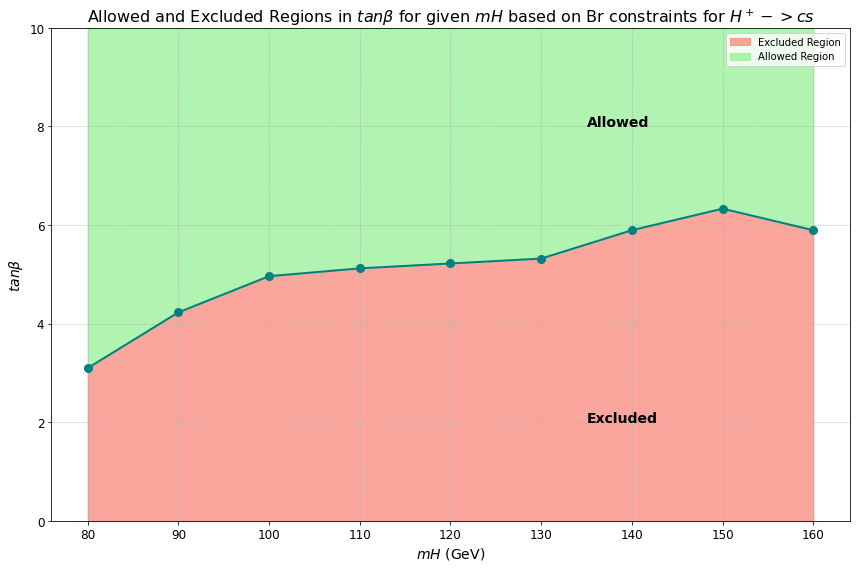

In [2]:
# Br values for different mH values
br_values_dict = {
    80: 0.05,
    90: 0.015,
    100: 0.008,
    110: 0.007,
    120: 0.0065,
    130: 0.006,
    140: 0.004,
    150: 0.003,
    160: 0.004
}

# Calculate the lower bounds on tan(beta) for each mH value based on the specified Br values for H+ -> cs
mH_values = list(br_values_dict.keys())
lower_bounds_tβ = []

# Find the lower bound of tan(beta) for which Br of H+ -> cs is less than the given value
for mH in mH_values:
    for tβ in np.linspace(0.1, 10, 500):  # Avoiding starting from 0 to avoid division by zero
        if BrcsX(mH, tβ) <= br_values_dict[mH]:
            lower_bounds_tβ.append(tβ)
            break

# Plot the exclusion regions for tan(beta)
plt.figure(figsize=(12, 8))
plt.plot(mH_values, lower_bounds_tβ, color='teal', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.fill_between(mH_values, 0, lower_bounds_tβ, color='salmon', alpha=0.7, label='Excluded Region')
plt.fill_between(mH_values, lower_bounds_tβ, 10, color='lightgreen', alpha=0.7, label='Allowed Region')

# Adding labels in the regions
plt.text(135, 2, 'Excluded', fontsize=14, fontweight='bold', color='black')
plt.text(135, 8, 'Allowed', fontsize=14, fontweight='bold', color='black')

plt.xlabel("$mH$ (GeV)", fontsize=14)
plt.ylabel("$tan\\beta$", fontsize=14)
plt.title("Allowed and Excluded Regions in $tan\\beta$ for given $mH$ based on Br constraints for $H^+ -> cs$", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 10)
plt.legend()
plt.tight_layout()
plt.show()
